Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

reading files

In [49]:
file="Salary_dataset.csv"
data=pd.read_csv(file)
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


pre-processing

In [50]:
df=df.drop("Unnamed: 0",axis=1)

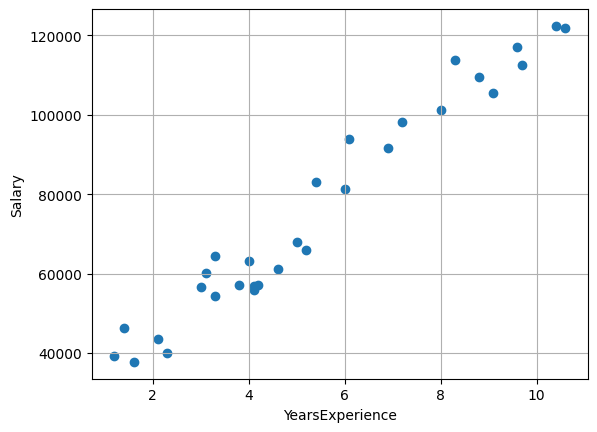

In [22]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid()
plt.show()

training model

In [51]:
lr=LinearRegression()
y=df["Salary"].values.reshape(-1,1)
x=df.drop("Salary",axis=1).values.reshape(-1,1)
lr.fit(x,y)

LinearRegression()

In [13]:
b0=lr.intercept_
b1=lr.coef_
print(b0,b1)

[24848.20396652] [[9449.96232146]]


predicting salary

In [14]:
lr.predict([[5]])

array([[72098.0155738]])

showing graphs

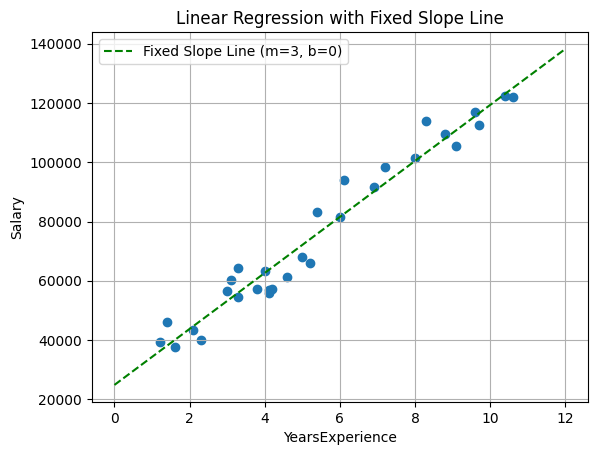

In [21]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
m = 9449.96232146  # Eğim
b = 24848.20396652  # Y kesişimi
X_line = np.array([[0], [12]])
y_line = m * X_line + b
plt.plot(X_line, y_line, color='green', linestyle='--', label='Fixed Slope Line (m=3, b=0)')
plt.title('Linear Regression with Fixed Slope Line')
plt.legend()
plt.grid()
plt.show()


Polynominal Regression


In [23]:
file="insurance.csv"
data=pd.read_csv(file)
df=pd.DataFrame(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df=df.drop(columns=["sex","smoker","children","region"])

In [25]:
df.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [30]:
y=df["charges"]
x=df.drop("charges",axis=1).values
lr.fit(x,y)

LinearRegression()

In [43]:
lr.predict([[18,32]])

array([8584.83229604])

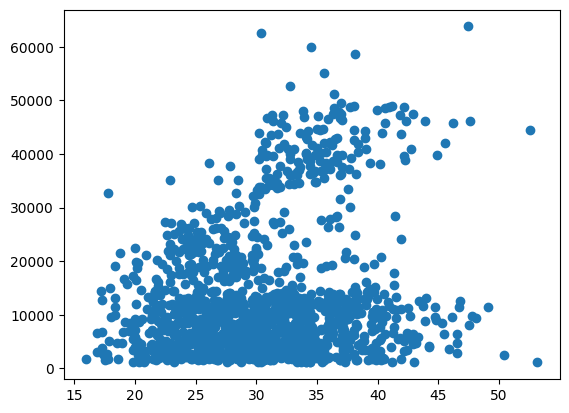

In [47]:
plt.scatter(df["bmi"],df["charges"])
plt.show()

In [52]:
from sklearn.metrics import r2_score
r2_score(y,lr.predict(x))


0.9569566641435086

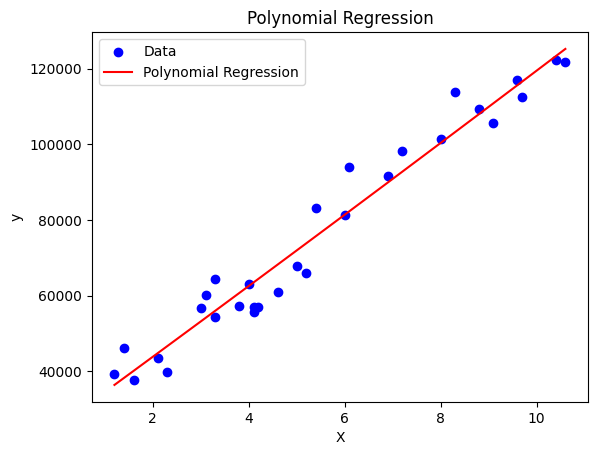

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)

# Lineer regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# Grafik çizdirme
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_poly_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [56]:
r2_score(y_poly_pred,lr.predict(x))

0.9999806638895459

Logistic Regression


In [89]:
file="column_2C_weka.csv"
data=pd.read_csv(file)
df=pd.DataFrame(data)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [91]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [92]:
df["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

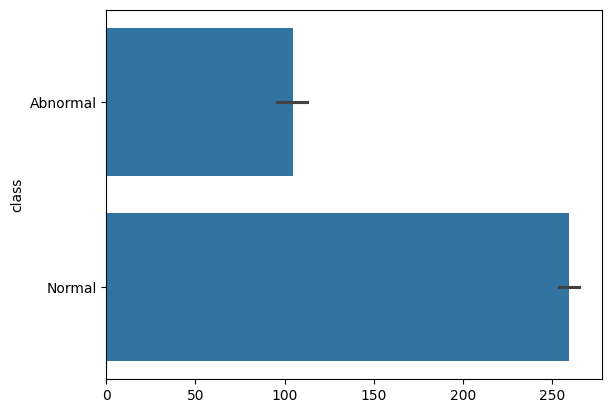

In [65]:
import seaborn as sns
sns.barplot(df["class"])    
plt.show()

In [93]:
df=pd.get_dummies(df,columns=["class"],drop_first=True)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,False
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,False
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,False
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,False
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,False


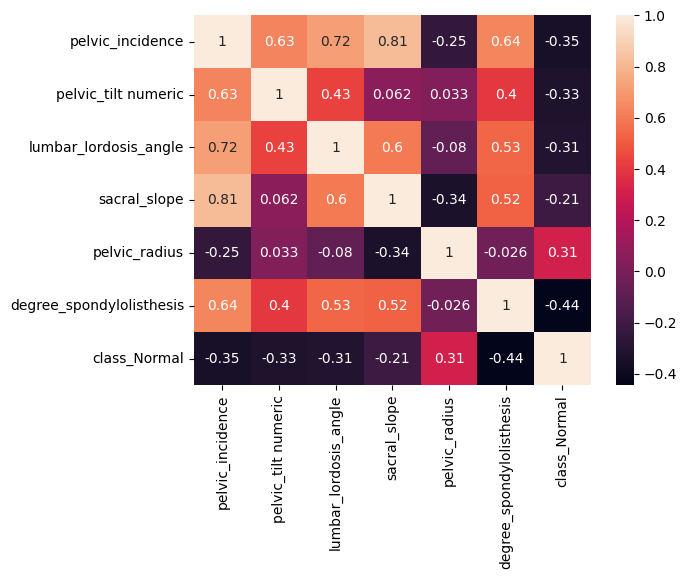

In [94]:
sns.heatmap(df.corr(), annot=True)
plt.show()

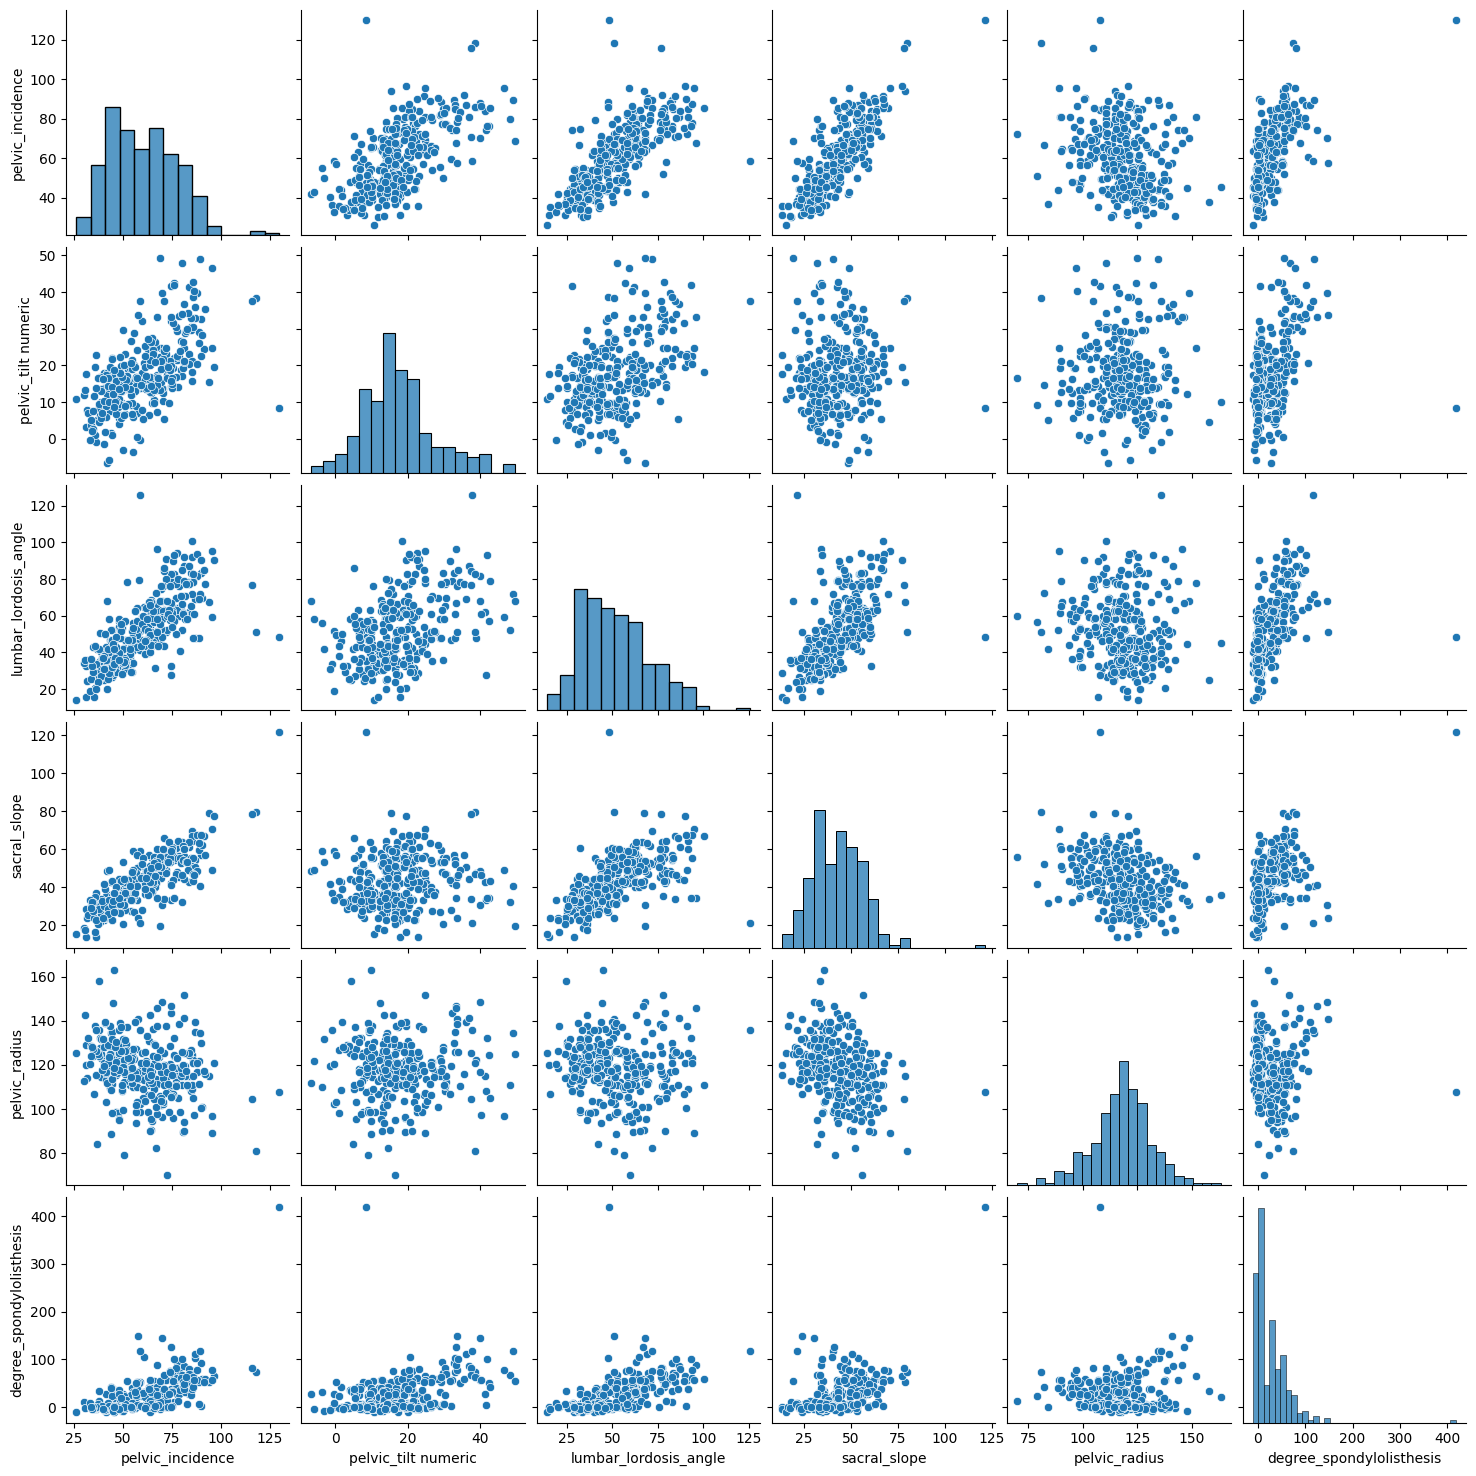

In [95]:
df_graph=df.drop(columns=["class_Normal"])
sns.pairplot(df_graph)
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

y=df["class_Normal"].values
x=df.drop("class_Normal",axis=1).values
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled)


X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)



In [97]:
X_train.shape

(248, 6)

In [99]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [100]:
model.score(X_test, y_test)

0.8709677419354839

K-Nearest Neighbour

<Axes: xlabel='sacral_slope', ylabel='pelvic_incidence'>

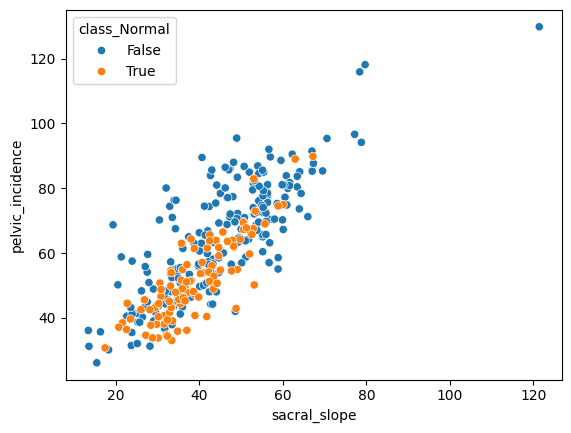

In [107]:
sns.scatterplot(data=df,x="sacral_slope",y="pelvic_incidence",color="sacral_slope",hue="class_Normal")

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8225806451612904